# **pyspec** example notebook:  1D spectrum

This notebook showcases a basic usage of **pyspec** for computing 2D spectrum and its associated isotropic spectrum. Other featrures such as bin average in log space and confidence limit estimation are also shown.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seawater as sw

from pyspec import spectrum as spec

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


# load data

In [3]:
fni = "data/lg0703_nb150.npz"

In [4]:
data = np.load(fni)

# Select  a gap-free segment

In [5]:
fmax = 135
lon,lat = data['lon1'][:fmax],data['lat1'][:fmax]
u, v = data['u1'][0,:fmax],data['v1'][0,:fmax]
urot, vrot = data['u1_rot'][0,:fmax],data['v1_rot'][0,:fmax]

In [6]:
d,ang = sw.dist(lat,lon,units='km') 
dist = np.append(0.,np.cumsum(d))

In [7]:
uspec = spec.Spectrum(urot[:],dt=5)
vspec = spec.Spectrum(vrot[:],dt=5)

# Plot spectra

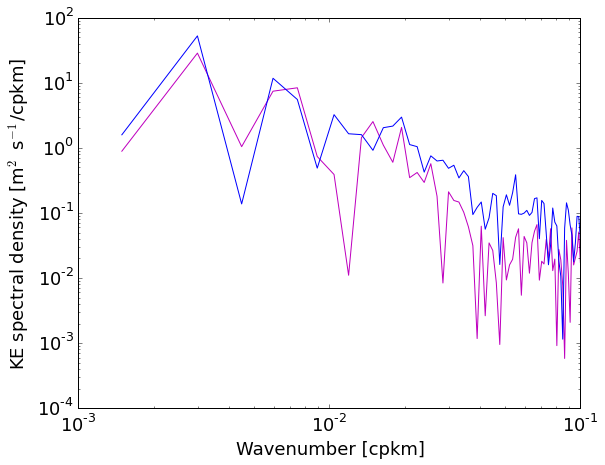

In [8]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.loglog(uspec.f,uspec.spec,'m')
ax.loglog(vspec.f,vspec.spec)
ax.set_xlabel('Wavenumber [cpkm]')
ax.set_ylabel(r'KE spectral density [m$^2$ s$^{-1}$/cpkm]')